In [1]:
#Import relevant libraries
import numpy as np
import pandas as pnd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
def definingParamsLinear(X, y, Xval, yval,vals):
    classifier = SVC(kernel="linear")
    classifier.fit(X,y)
    prediction = classifier.predict(Xval)
    acc = classifier.score(Xval,yval)
    best_C=1.0
    best_gamma='scale'
    for i in vals:
        C= i
        for j in vals:
            gamma = 1/j
            classifier = SVC(C=C,gamma=gamma, kernel="linear")
            classifier.fit(X,y)
            prediction = classifier.predict(Xval)
            score = classifier.score(Xval,yval)
            if score>acc:
                acc =score
                best_C =C
                best_gamma=gamma
    return best_C, best_gamma

def definingParamsGaussian(X, y, Xval, yval,vals):
    classifier = SVC(kernel="rbf")
    classifier.fit(X,y)
    prediction = classifier.predict(Xval)
    acc = classifier.score(Xval,yval)
    best_C=1.0
    best_gamma='scale'
    for i in vals:
        C= i
        for j in vals:
            gamma = 1/j
            classifier = SVC(C=C,gamma=gamma, kernel="rbf")
            classifier.fit(X,y)
            prediction = classifier.predict(Xval)
            score = classifier.score(Xval,yval)
            if score>acc:
                acc =score
                best_C =C
                best_gamma=gamma
    return best_C, best_gamma

In [10]:
def featureNormalization(X):
    """
    Take in numpy array of X values and return normalize X values,
    the mean and standard deviation of each feature
    """
    mean=np.mean(X,axis=0)
    std=np.std(X,axis=0)
    
    X_norm = (X-mean)/std
    
    return X_norm , mean , std

In [11]:
relevant_features = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "diagnosis"]
data = pnd.read_csv("processed.cleveland.csv", names=relevant_features)

In [12]:
data.drop(data[data["ca"] == '?'].index, inplace=True)
data.drop(data[data["thal"] == '?'].index, inplace=True)
data = data.astype('float64') 

In [13]:
#No ressample
data_binary = data.copy()
data_binary["diagnosis"] = data_binary.diagnosis.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})
data_binary.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,diagnosis
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768,4.730640,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,1.938629,0.499340
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


(array([160.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 137.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

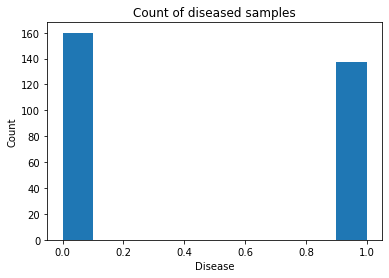

In [14]:
data_binary_n = data_binary.values
#print(data_binary_n.shape)

X_binary = data_binary_n[:,:-1]
y_binary = data_binary_n[:,-1]

plt.title("Count of diseased samples")
plt.xlabel("Disease")
plt.ylabel("Count")
plt.hist(y_binary)

In [16]:
X_binary, mean_X, std_X = featureNormalization(X_binary)

from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

cv = KFold(10)

scores_linear = []
scores_gaussian = []

accuracy_linear =[]
recall_linear = []
specifity_linear = []
precision_linear = []
F1_linear = []

accuracy_gaussian =[]
recall_gaussian = []
specifity_gaussian = []
precision_gaussian = []
F1_gaussian = []

cm_test_linear = []
cm_test_gaussian = []

for train_index, test_index in cv.split(X_binary):

    X_binary_train, X_binary_val, y_binary_train, y_binary_val = X_binary[train_index], X_binary[test_index], y_binary[train_index], y_binary[test_index]
    
    #posso fazer o definingParams para cada um?
    vals = [0.01,0.03,0.3,1,3,10,30]
    best_C_linear, best_gamma_linear = definingParamsLinear(X_binary_train, y_binary_train.ravel(), X_binary_val, y_binary_val.ravel(),vals)
    best_C_gaussian, best_gamma_gaussian = definingParamsGaussian(X_binary_train, y_binary_train.ravel(), X_binary_val, y_binary_val.ravel(),vals)
    
    classifier = SVC(C=best_C_linear, gamma=best_gamma_linear, kernel="linear")
#     classifier = SVC(kernel="linear")
    classifier.fit(X_binary_train,np.ravel(y_binary_train))
    score = classifier.score(X_binary_train,y_binary_train)
    scores_linear.append(score)
    prediction = classifier.predict(X_binary_val)
    cm_test = confusion_matrix(prediction, y_binary_val)
    cm_test_linear.append(cm_test)
    
    tn = cm_test[0][0]
    fp = cm_test[1][0]
    fn = cm_test[0][1]
    tp = cm_test[1][1]
    
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    recall = (tp) / (tp + fn)
    specifity = (tn) / (tn + fp)
    precision = (tp) / (tp + fp)
    F1 = 2*(recall * precision)/(recall+precision)
    
    accuracy_linear.append(accuracy)
    recall_linear.append(recall)
    specifity_linear.append(specifity)
    precision_linear.append(precision)
    F1_linear.append(F1)

    classifier = SVC(C=best_C_gaussian, gamma=best_gamma_gaussian, kernel="rbf")
#     classifier = SVC(kernel="rbf")
    classifier.fit(X_binary_train,np.ravel(y_binary_train))
    score = classifier.score(X_binary_train,y_binary_train)
    scores_gaussian.append(score)
    prediction = classifier.predict(X_binary_val)
    cm_test = confusion_matrix(prediction, y_binary_val)
    cm_test_gaussian.append(cm_test)
    
    tn = cm_test[0][0]
    fp = cm_test[1][0]
    fn = cm_test[0][1]
    tp = cm_test[1][1]
    
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    recall = (tp) / (tp + fn)
    specifity = (tn) / (tn + fp)
    precision = (tp) / (tp + fp)
    F1 = 2*(recall * precision)/(recall+precision)
    
    accuracy_gaussian.append(accuracy)
    recall_gaussian.append(recall)
    specifity_gaussian.append(specifity)
    precision_gaussian.append(precision)
    F1_gaussian.append(F1)
    
print("Mean linear kernel classification: ", np.mean(scores_linear))
print("Mean linear kernel accuracy: ", np.mean(accuracy_linear))
print("Mean linear kernel recall: ", np.mean(recall_linear))
print("Mean linear kernel specifity: ", np.mean(specifity_linear))
print("Mean linear kernel precision: ", np.mean(precision_linear))
print("Mean linear kernel F1: ", np.mean(F1_linear))

print("\nMean gaussian kernel classification: ", np.mean(scores_gaussian))
print("Mean gaussian kernel accuracy: ", np.mean(accuracy_gaussian))
print("Mean gaussian kernel recall: ", np.mean(recall_gaussian))
print("Mean gaussian kernel specifity: ", np.mean(specifity_gaussian))
print("Mean gaussian kernel precision: ", np.mean(precision_gaussian))
print("Mean gaussian kernel F1: ", np.mean(F1_gaussian))

Mean linear kernel classification:  0.8503549667393371
Mean linear kernel accuracy:  0.8583908045977011
Mean linear kernel recall:  0.8017443667443667
Mean linear kernel specifity:  0.9067116320212294
Mean linear kernel precision:  0.8864382212215031
Mean linear kernel F1:  0.8363387216419144

Mean gaussian kernel classification:  0.9105875118788083
Mean gaussian kernel accuracy:  0.8618390804597702
Mean gaussian kernel recall:  0.8088872238872238
Mean gaussian kernel specifity:  0.9058146591970122
Mean gaussian kernel precision:  0.8868138397550162
Mean gaussian kernel F1:  0.842284980460296


(array([160.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 160.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

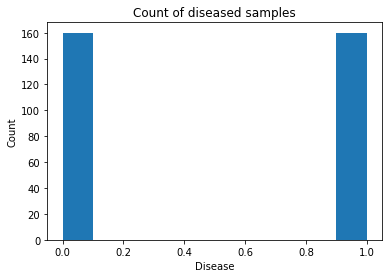

In [17]:
data_n = data_binary.values

X = data_n[:,:-1]
y = data_n[:,-1]

import imblearn

from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_binary, y_binary = ros.fit_sample(X, y)

plt.title("Count of diseased samples")
plt.xlabel("Disease")
plt.ylabel("Count")
plt.hist(y_binary)

In [18]:
X_binary, mean_X, std_X = featureNormalization(X_binary)

from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

cv = KFold(10)

scores_linear = []
scores_gaussian = []

accuracy_linear =[]
recall_linear = []
specifity_linear = []
precision_linear = []
F1_linear = []

accuracy_gaussian =[]
recall_gaussian = []
specifity_gaussian = []
precision_gaussian = []
F1_gaussian = []

cm_test_linear = []
cm_test_gaussian = []

for train_index, test_index in cv.split(X_binary):
    
    X_binary_train, X_binary_val, y_binary_train, y_binary_val = X_binary[train_index], X_binary[test_index], y_binary[train_index], y_binary[test_index]
    
    #posso fazer o definingParams para cada um?
    vals = [0.01,0.03,0.3,1,3,10,30]
    best_C_linear, best_gamma_linear = definingParamsLinear(X_binary_train, y_binary_train.ravel(), X_binary_val, y_binary_val.ravel(),vals)
    best_C_gaussian, best_gamma_gaussian = definingParamsGaussian(X_binary_train, y_binary_train.ravel(), X_binary_val, y_binary_val.ravel(),vals)
    
    classifier = SVC(C=best_C_linear, gamma=best_gamma_linear, kernel="linear")
#     classifier = SVC(kernel="linear")
    classifier.fit(X_binary_train,np.ravel(y_binary_train))
    score = classifier.score(X_binary_train,y_binary_train)
    scores_linear.append(score)
    prediction = classifier.predict(X_binary_val)
    cm_test = confusion_matrix(prediction, y_binary_val)
    cm_test_linear.append(cm_test)
    
    tn = cm_test[0][0]
    fp = cm_test[1][0]
    fn = cm_test[0][1]
    tp = cm_test[1][1]
    
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    recall = (tp) / (tp + fn)
    specifity = (tn) / (tn + fp)
    precision = (tp) / (tp + fp)
    F1 = 2*(recall * precision)/(recall+precision)
    
    accuracy_linear.append(accuracy)
    recall_linear.append(recall)
    specifity_linear.append(specifity)
    precision_linear.append(precision)
    F1_linear.append(F1)

    classifier = SVC(C=best_C_gaussian, gamma=best_gamma_gaussian, kernel="rbf")
#     classifier = SVC(kernel="rbf")
    classifier.fit(X_binary_train,np.ravel(y_binary_train))
    score = classifier.score(X_binary_train,y_binary_train)
    scores_gaussian.append(score)
    prediction = classifier.predict(X_binary_val)
    cm_test = confusion_matrix(prediction, y_binary_val)
    cm_test_gaussian.append(cm_test)
    
    tn = cm_test[0][0]
    fp = cm_test[1][0]
    fn = cm_test[0][1]
    tp = cm_test[1][1]
    
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    recall = (tp) / (tp + fn)
    specifity = (tn) / (tn + fp)
    precision = (tp) / (tp + fp)
    F1 = 2*(recall * precision)/(recall+precision)
    
    accuracy_gaussian.append(accuracy)
    recall_gaussian.append(recall)
    specifity_gaussian.append(specifity)
    precision_gaussian.append(precision)
    F1_gaussian.append(F1)
    
print("Mean linear kernel classification: ", np.mean(scores_linear))
print("Mean linear kernel accuracy: ", np.mean(accuracy_linear))
print("Mean linear kernel recall: ", np.mean(recall_linear))
print("Mean linear kernel specifity: ", np.mean(specifity_linear))
print("Mean linear kernel precision: ", np.mean(precision_linear))
print("Mean linear kernel F1: ", np.mean(F1_linear))

print("\nMean gaussian kernel classification: ", np.mean(scores_gaussian))
print("Mean gaussian kernel accuracy: ", np.mean(accuracy_gaussian))
print("Mean gaussian kernel recall: ", np.mean(recall_gaussian))
print("Mean gaussian kernel specifity: ", np.mean(specifity_gaussian))
print("Mean gaussian kernel precision: ", np.mean(precision_gaussian))
print("Mean gaussian kernel F1: ", np.mean(F1_gaussian))

Mean linear kernel classification:  0.8524305555555556
Mean linear kernel accuracy:  0.85625
Mean linear kernel recall:  0.8249552303062739
Mean linear kernel specifity:  0.8996704997788589
Mean linear kernel precision:  0.8775748597807421
Mean linear kernel F1:  0.842954427510176

Mean gaussian kernel classification:  0.9211805555555556
Mean gaussian kernel accuracy:  0.88125
Mean gaussian kernel recall:  0.8593283587590989
Mean gaussian kernel specifity:  0.9035832227627892
Mean gaussian kernel precision:  0.8834462029198871
Mean gaussian kernel F1:  0.8675818010881123


(array([160.,   0.,  54.,   0.,   0.,  35.,   0.,  35.,   0.,  13.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

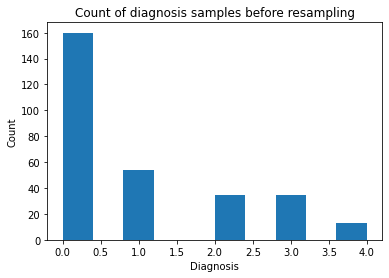

In [26]:
data_n = data.values

X = data_n[:,:-1]
y = data_n[:,-1]

plt.title("Count of diagnosis samples before resampling")
plt.xlabel("Diagnosis")
plt.ylabel("Count")
plt.hist(y)

(array([160.,   0., 160.,   0.,   0., 160.,   0., 160.,   0., 160.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

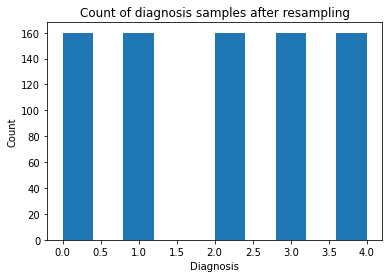

In [27]:
import imblearn

from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_ros, y_ros = ros.fit_sample(X, y)

plt.title("Count of diagnosis samples after resampling")
plt.xlabel("Diagnosis")
plt.ylabel("Count")
plt.hist(y_ros)

In [20]:
X_ros, mean_X, std_X = featureNormalization(X_ros)

from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

cv = KFold(10)

scores_linear = []
scores_gaussian = []

accuracy_linear =[]
recall_linear = []
specifity_linear = []
precision_linear = []
F1_linear = []

accuracy_gaussian =[]
recall_gaussian = []
specifity_gaussian = []
precision_gaussian = []
F1_gaussian = []

cm_test_linear = []
cm_test_gaussian = []

for train_index, test_index in cv.split(X_ros):
    
    X_train, X_val, y_train, y_val = X_ros[train_index], X_ros[test_index], y_ros[train_index], y_ros[test_index]

#     print(y_val)
    
    #posso fazer o definingParams para cada um?
    vals = [0.01,0.03,0.3,1,3,10,30]
    best_C_linear, best_gamma_linear = definingParamsLinear(X_train, y_train.ravel(), X_val, y_val.ravel(),vals)
    best_C_gaussian, best_gamma_gaussian = definingParamsGaussian(X_train, y_train.ravel(), X_val, y_val.ravel(),vals)
    
    classifier = SVC(C=best_C_linear, gamma=best_gamma_linear, kernel="linear")
#     classifier = SVC(kernel="linear")
    classifier.fit(X_train,np.ravel(y_train))
    score = classifier.score(X_train,y_train)
    scores_linear.append(score)
    prediction = classifier.predict(X_val)
    cm_test = confusion_matrix(prediction, y_val)
    cm_test_linear.append(cm_test)
    
#     t0 = cm_test[0][0]
#     f0 = cm_test[0][1]+cm_test[0][2]+cm_test[0][3]+cm_test[0][4]
#     t1 = cm_test[1][1]
#     f1 = cm_test[1][0]+cm_test[1][2]+cm_test[1][3]+cm_test[1][4]
#     t2 = cm_test[2][2]
#     f2 = cm_test[2][0]+cm_test[2][1]+cm_test[2][3]+cm_test[2][4]
#     t3 = cm_test[3][3]
#     f3 = cm_test[3][0]+cm_test[3][1]+cm_test[3][2]+cm_test[3][4]
#     t4 = cm_test[4][4]
#     f4 = cm_test[4][0]+cm_test[4][1]+cm_test[4][2]+cm_test[4][3]

    
#     accuracy = (t0 + t1 + t2 + t3 + t4) / (t0 + t1 + t2 + t3 + t4 + f0 + f1 + f2 + f3 + f4)
    accuracy = np.sum(prediction==y_val)/len(prediction)
    accuracy_linear.append(accuracy)

    classifier = SVC(C=best_C_gaussian, gamma=best_gamma_gaussian, kernel="rbf")
#     classifier = SVC(kernel="rbf")
    classifier.fit(X_train,np.ravel(y_train))
    score = classifier.score(X_train,y_train)
    scores_gaussian.append(score)
    prediction = classifier.predict(X_val)
    cm_test = confusion_matrix(prediction, y_val)
    cm_test_gaussian.append(cm_test)
    
#     t0 = cm_test[0][0]
#     f0 = cm_test[0][1]+cm_test[0][2]+cm_test[0][3]+cm_test[0][4]
#     t1 = cm_test[1][1]
#     f1 = cm_test[1][0]+cm_test[1][2]+cm_test[1][3]+cm_test[1][4]
#     t2 = cm_test[2][2]
#     f2 = cm_test[2][0]+cm_test[2][1]+cm_test[2][3]+cm_test[2][4]
#     t3 = cm_test[3][3]
#     f3 = cm_test[3][0]+cm_test[3][1]+cm_test[3][2]+cm_test[3][4]
#     t4 = cm_test[4][4]
#     f4 = cm_test[4][0]+cm_test[4][1]+cm_test[4][2]+cm_test[4][3]

    
#     accuracy = (t0 + t1 + t2 + t3 + t4) / (t0 + t1 + t2 + t3 + t4 + f0 + f1 + f2 + f3 + f4)
    accuracy = np.sum(prediction==y_val)/len(prediction)
    accuracy_gaussian.append(accuracy)
    
print("Mean linear kernel classification: ", np.mean(scores_linear))
print("Mean linear kernel accuracy: ", np.mean(accuracy_linear))

print("\nMean gaussian kernel classification: ", np.mean(scores_gaussian))
print("Mean gaussian kernel accuracy: ", np.mean(accuracy_gaussian))

Mean linear kernel classification:  0.6277777777777778
Mean linear kernel accuracy:  0.4462499999999999

Mean gaussian kernel classification:  1.0
Mean gaussian kernel accuracy:  0.99
